#### Nome: Laerton Amorim Correia

#### Dicionário de dados

PassengerId: Identificação única do passageiro

Survived: Identificação de sobrevivência (1 sobreviveu/ 0 Não Sobreviveu)

Pclass: Classe em que a pessoa esta viajando sendo 1 a melhor classe e 3 a pior classe

Name: Nome do Passageiro

Sex: Gênero do Passageiro (Male = Masculino / Female = Feminino)

Age: Idade do passageiro no dia do acidente

SibSp: Número de irmãos ou cônjuges a bordo

Parch: Número de pais ou filhos a bordo

Ticket: Número do ticket

Fare: Valor pago na passagem

Cabin: Código da Cabine

Embarked: Local onde o passageiro embarcou no navio

### Análise inicial dos dados

In [1]:
#Importando bobliotecas
import pandas as pd

In [2]:
# #Para pc linux
# %%bash
# echo "Verificando o enconder do arquivo"
# file -i Titanic.csv

In [3]:
#Carregando a fonte de dados
dfbase=pd.read_csv("../datasets/base/Titanic.csv", encoding="us-ascii")

In [4]:
dfbase.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dfbase.shape

(891, 12)

### Analisando dados Faltantes

In [6]:
#dfbase.isnull().sum()
pd.concat([dfbase.isna().sum(),
           round(dfbase.isna().sum()*100/len(dfbase),2)],
          axis=1,keys=["QTD", "PERCENT%"])
#As variáveis Age, Cabin e Embarket apresentam sucessivamente 20%, 77% e 0.2 de dados faltantes."

,QTD,PERCENT%
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [7]:
dfbase.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
print(dfbase.Embarked.describe())
dfbase.Embarked.describe().freq/len(dfbase)

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


0.7227833894500562

In [9]:
#Para a variável Age a estratégia adotada será inserir o valor 999999 para destacar os faltantes.
dfbase.Age.fillna(999.0, inplace=True)

#Para a variável Cabin a estratégia adotada será inserir a denominação missing para destacar os faltantes.
dfbase.Cabin.fillna("missing", inplace=True)

#Considerando que 72% dos passageiros embarcaram no porto S e que a quantidade de faltante é 0.2%.
#serão considerados os valores faltantes como passageiros que embarcaram no porto S
dfbase.Embarked.fillna("S", inplace=True)

In [10]:
dfbase.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
#Verificando se existem linhas duplicadas na base de dados
dfbase.duplicated().sum()

0

### Análise exploratória dos dados

In [12]:
#Conhecendo o tipo das variáveis

In [13]:
dfbase.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
dfbase.Survived.unique()

array([0, 1], dtype=int64)

In [15]:
#Adequação de tipo para algumas variáveis

#A variáveis categóricas
dfbase.Survived=dfbase.Survived.astype('object')
dfbase.Pclass=dfbase.Pclass.astype('object')


In [16]:
#Lista de variáveis categóricas
cat_vars = dfbase.select_dtypes(include='object').columns.to_list()
key_vars=["PassengerId"]
#Lista de variáveis numéricas
num_vars = [col for col in dfbase.columns if col not in cat_vars + key_vars]
print("Chave:",key_vars)
print("Numéricas:",num_vars)
print("Categóricas:",cat_vars)

Chave: ['PassengerId']
Numéricas: ['Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### Análise Exploratória Univariada, Age

In [17]:
#Medidadas de posição e dispersão dos dados

In [18]:
#define casas decimas exibidas
pd.options.display.float_format = "{:.2f}".format
dfbase[num_vars].describe()

#Aqui há a influência dos dados missing, por isso as medidas para Age apresentam viés,
#contudo foi mantido para análise das demais variáveis, por exemplo Fare que mostra que embora 
#o preço máximo do bilhete pago seja de 512.33 75% dos passageiros pagou até 31.00.

,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00
mean,222.25,0.52,0.38,32.20
std,387.17,1.10,0.81,49.69
min,0.42,0.00,0.00,0.00
25%,22.00,0.00,0.00,7.91
50%,32.00,0.00,0.00,14.45
75%,54.00,1.00,0.00,31.00
max,999.00,8.00,6.00,512.33


In [19]:
#Não considerando missing
pd.options.display.float_format = "{:.2f}".format
dfbase[num_vars].query('Age<999.0').describe()

# Removendo os valores missing de Age, pode-se verificar que a idade média dos passageiros
# é inferior a 30 anos, olhando para o terceiro quartil, pode-se verificar que 75% dos passageiros tem até 38 anos.

,Age,SibSp,Parch,Fare
count,714.00,714.00,714.00,714.00
mean,29.70,0.51,0.43,34.69
std,14.53,0.93,0.85,52.92
min,0.42,0.00,0.00,0.00
25%,20.12,0.00,0.00,8.05
50%,28.00,0.00,0.00,15.74
75%,38.00,1.00,1.00,33.38
max,80.00,5.00,6.00,512.33


In [20]:
#importando bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

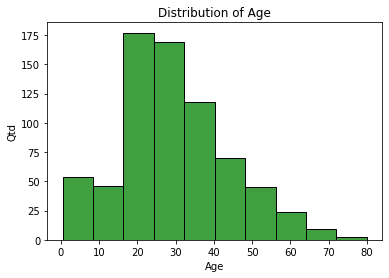

In [21]:
# plt.figure(figsize=(14,4))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Qtd')
plt.grid(False)
# sns.set(font_scale = 1)
sns.histplot(data=dfbase.query('Age<999.0'), x='Age',
             bins=10, color='green', linewidth=1, edgecolor='black');

#Pode-se verificar aqui que o perfil de idade dominante está entre 20 e 30 anos

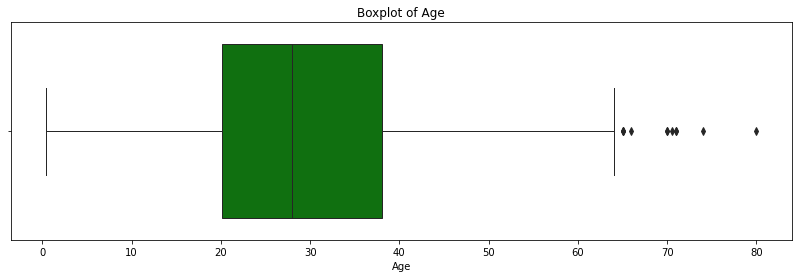

In [22]:
plt.figure(figsize=(14,4))
plt.title("Boxplot of Age")
plt.grid(False)
sns.boxplot(data=dfbase.query('Age<999.0'), x='Age', 
            color='green', linewidth=1 );

#Verifica-se aqui que exitem outliers que apresentam idades maiores ou iguais 66 anos.
#Contudo foi verificado que a idade máxima encontrada é de 80 o que é perfeitamente possível,
#isso influência no desvio padrão contudo é caracterísitica dos dados

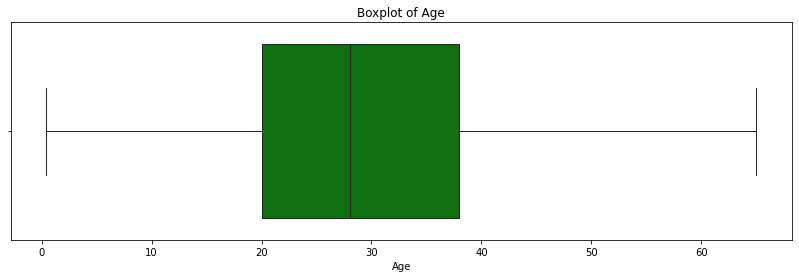

In [23]:
plt.figure(figsize=(14,4))
plt.title("Boxplot of Age")
plt.grid(False)
sns.boxplot(data=dfbase.query('Age<999.0 and Age < 66'), x='Age', 
            color='green', linewidth=1 );
#Um pequeno teste retirando passageiros com idade igual ou superior a 66 anos

### Análise exploratória Bivariada em relação a Age

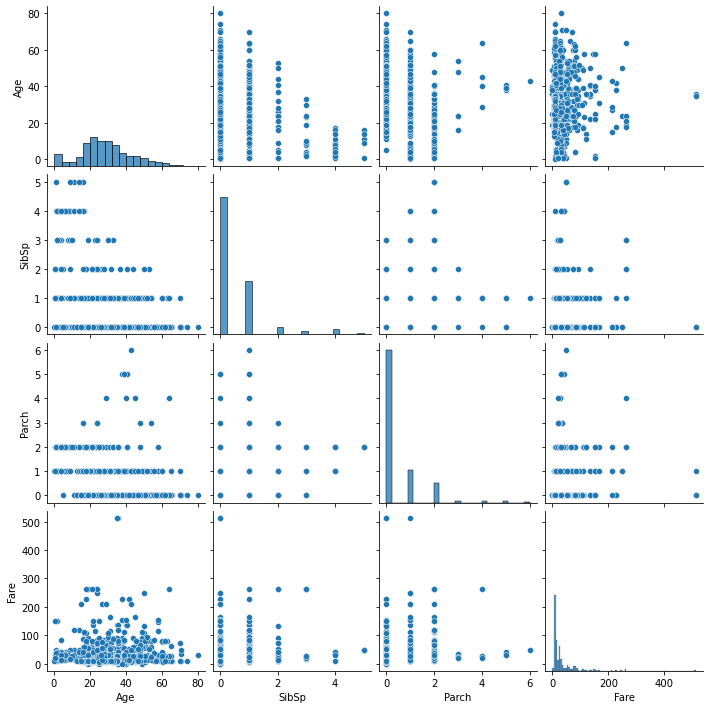

In [24]:
#Quantitativa x Quantitativa
sns.pairplot(dfbase[num_vars].query('Age<999.0'),kind='scatter');

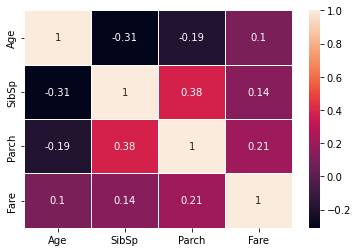

In [25]:
# plt.subplots(figsize=(15, 10))
sns.heatmap(dfbase[num_vars]
            .query('Age<999.0').corr(method='pearson')
            .round(2), annot=True, linewidths=0.5);

    0.9 para mais ou para menos indica uma correlação muito forte.
    0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    0 a 0.3 positivo ou negativo indica uma correlação desprezível.

In [26]:
#Observando o gráfico de dispersão assim como o mapa de calor
#e os valores da matriz de correlação há correlação fraca e inversa
#entre as variávei Age(idade) e SibSp(Número de irmãos ou cônjuges a bordo).
#Há correlação mais forte entre e direta entre SisbSp e Parch(Número de pais ou filhos a bordo).

#Conclusão
# Aparentemente pessoas de mais idade viajavam com menor número de parente,
#Há muma relação direta entre Número de irmãos ou cônjuges a bordo e
#Número de pais ou filhos a bordo o que indica que irmãos ou conjgues a bordo
#tendem a estar com os pais ou filhos.

In [27]:
#Quantitativa x Qualitativa

In [28]:
#Medidas de Frequência I
#Considerando todos os registros
dfbase[cat_vars].describe()

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,891
unique,2,3,891,2,681,148,3
top,0,3,"Braund, Mr. Owen Harris",male,347082,missing,S
freq,549,491,1,577,7,687,646


In [29]:
#Medidas de Frequência II
#Descondiderando missing da variável Age
dfbase.query('Age < 999.0')[cat_vars].describe()


# Observando as medidas de frequência I e II verifica-se que o número de homens(male) é
# significativamente maior que o número de mulheres(female) na tripulação.

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,714,714,714,714,714,714,714
unique,2,3,714,2,542,135,3
top,0,3,"Braund, Mr. Owen Harris",male,347082,missing,S
freq,424,355,1,453,7,529,556


Survived: Identificação de sobrevivência (1 sobreviveu/ 0 Não Sobreviveu)


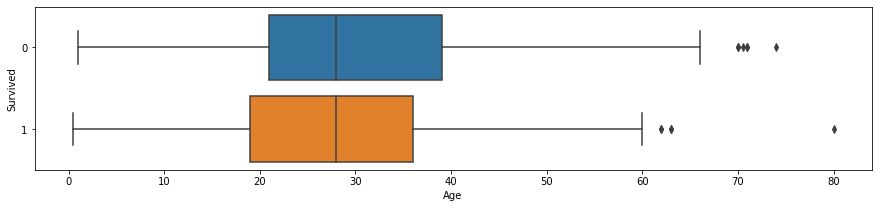

In [30]:
fig, ax = plt.subplots(figsize=(15,3))
ax =sns.boxplot(data=dfbase.query('Age<999.0'), 
                x='Age',
                y='Survived', linewidth=1.5, orient="h");
ax.grid(False)

print("Survived: Identificação de sobrevivência (1 sobreviveu/ 0 Não Sobreviveu)")

#Observa-se que sobreviventes e não sobreviventes tèm medianas próximas, isso já era esperado
#pelo perfil da tripulação. É interessante verificar a tendência a sobrevivência dos tripulantes com
#menor idade assim como a tendência de NÃO sobrevivência aos de maior idade.

Pclass: Classe em que a pessoa esta viajando sendo 1 a melhor classe e 3 a pior classe


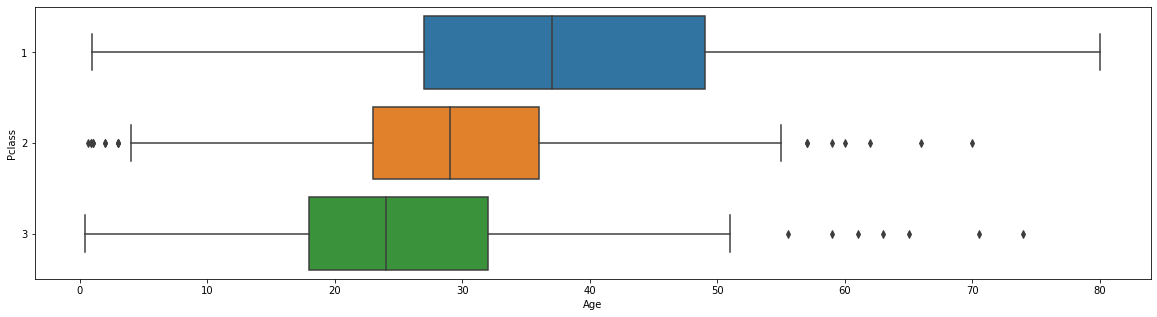

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
ax =sns.boxplot(data=dfbase.query('Age<999.0'), 
                x='Age', 
                y='Pclass', linewidth=1.5, orient="h");
ax.grid(False)

print("Pclass: Classe em que a pessoa esta viajando sendo 1 a melhor classe e 3 a pior classe")

#Os tripulantes da melhor classe tendem a ser mais velhos, contudo observado as medidas verifica-se
#que a pior classe é aquela que possui a maior quantidade de tripulantes

Sex: Gênero do Passageiro (Male = Masculino / Female = Feminino)


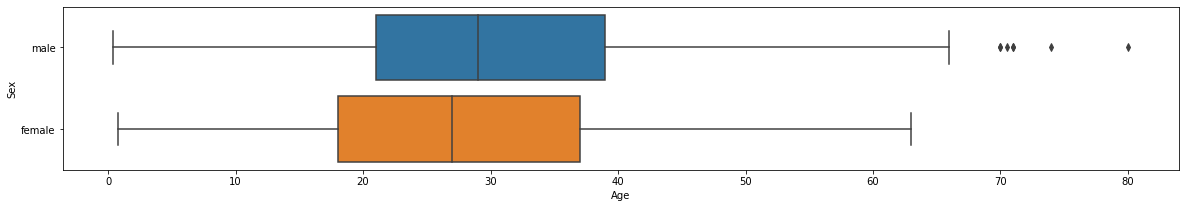

In [32]:
fig, ax = plt.subplots(figsize=(20,3))
ax =sns.boxplot(data=dfbase.query('Age<999.0'), 
                x='Age', 
                y='Sex', linewidth=1.5, orient="h");
ax.grid(False)

print("Sex: Gênero do Passageiro (Male = Masculino / Female = Feminino)")

# Observando as medidas de frequência observamos que as mulheres estão presentes em menor quantidade e que
# possuem em geral menor idade do que os homens.

In [33]:
dfbase.query('Age<999.0 and Sex=="female"')[cat_vars].describe()

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,261,261,261,261,261,261,261
unique,2,3,261,1,206,71,3
top,1,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,347082,missing,S
freq,197,102,1,261,5,171,188


In [34]:
pd.concat([dfbase.query('Age<999.0 and Sex=="female"')["Age"].describe(),
          dfbase.query('Age<999.0 and Sex=="male"')["Age"].describe()],
          keys=["Female","Male"], axis=1)

,Female,Male
count,261.00,453.00
mean,27.92,30.73
std,14.11,14.68
min,0.75,0.42
25%,18.00,21.00
50%,27.00,29.00
75%,37.00,39.00
max,63.00,80.00


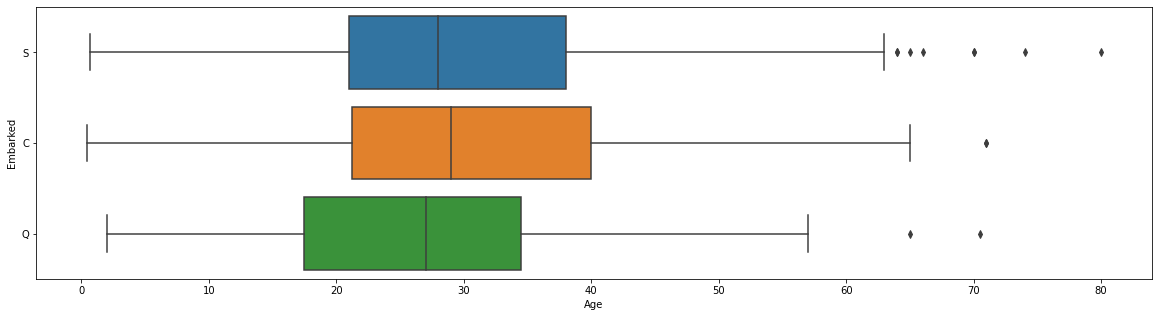

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
ax =sns.boxplot(data=dfbase.query('Age<999.0'), 
                x='Age', 
                y='Embarked', linewidth=1.5, orient="h");
ax.grid(False)

#Observando as tabelas de frequencia verifica-se que mais de 50 dos passageiros embarcaram no porto "S".
# O gráfico abaixo mostra que em geral passageiros de menor idade embarcam no porto "Q" e os de maior idade
# nos portos "C" e "S".

#### Olhando com mais atenção para a variável Fare

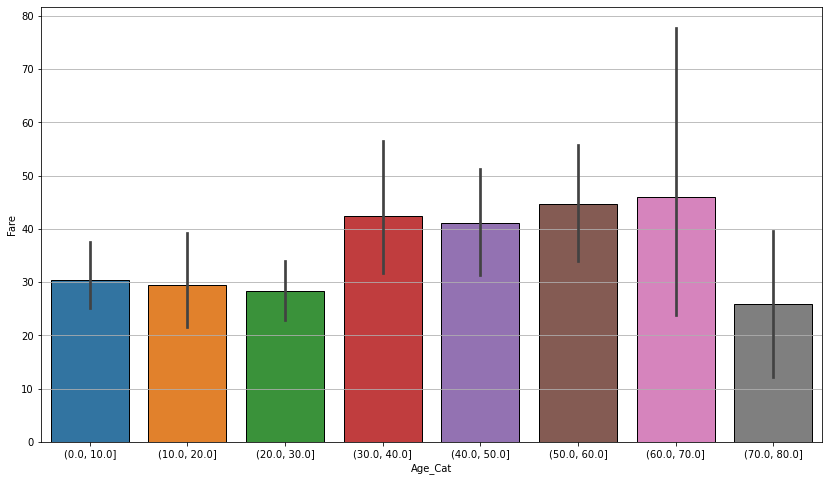

In [36]:
# Categorizando a variável Age em um novo dataset 
dfteste=dfbase.query('Age<999.0').copy()
dfteste['Age_Cat']=pd.cut(dfteste['Age'],8, precision=0)

import seaborn as sns
plt.figure(figsize=(14,8))
plt.grid(True)
sns.barplot(x="Age_Cat", y="Fare", data=dfteste, linewidth=1, edgecolor='black');

# Pode-se verificar que passageiros que possuem idade entre 30 e 70 anos têm valores médios
# de ticket(Fare) mais elevados. 

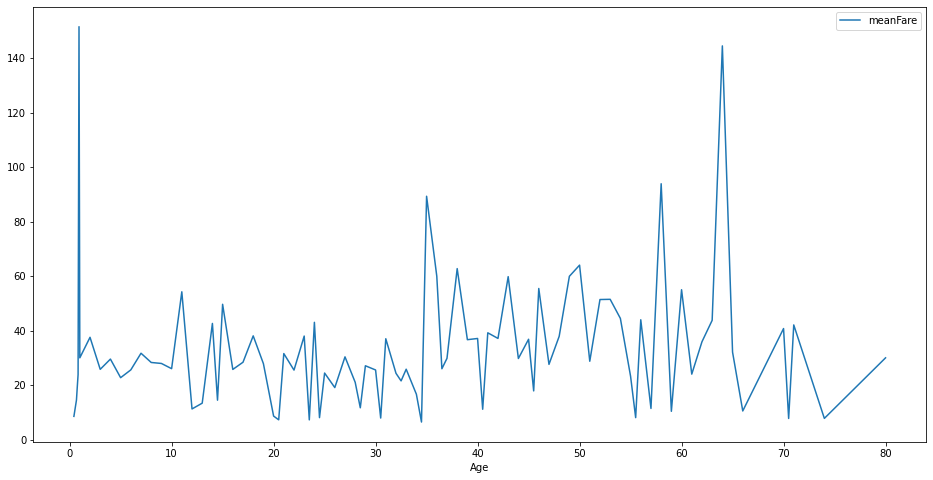

In [37]:
(
    dfbase.query('Age< 999.0')
    .groupby(['Age'])
    .agg(meanFare = ('Fare', 'mean'))
    .reset_index()
    .plot(x="Age", y="meanFare", figsize=(16,8))
);

#Outra visaualização possível

In [38]:
dfteste.query('Age >60.0 and Age <=70.0').describe()

,PassengerId,Age,SibSp,Parch,Fare
count,17.00,17.00,17.00,17.00,17.00
mean,430.88,63.88,0.18,0.35,45.91
std,232.19,2.78,0.39,1.00,61.33
min,34.00,61.00,0.00,0.00,6.24
25%,276.00,62.00,0.00,0.00,10.50
50%,457.00,63.00,0.00,0.00,26.55
75%,571.00,65.00,0.00,0.00,61.98
max,830.00,70.00,1.00,4.00,263.00


#### Olhando com mais atenção para a variável Sexo(Sex)

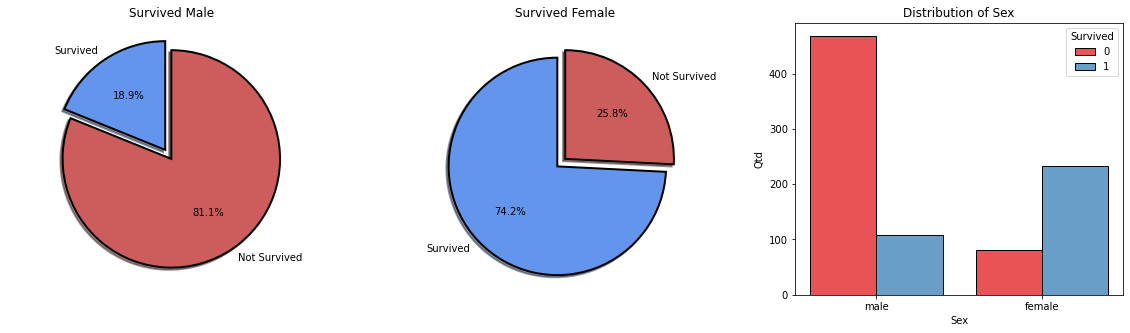

Survived: Identificação de sobrevivência (1 sobreviveu/ 0 Não Sobreviveu)


In [39]:
import matplotlib.pyplot as plt

fig,(ax2,ax1,ax3)=plt.subplots(1,3, figsize=(20,5))
colores = ('cornflowerblue','indianred' )
labels=['Survived','Not Survived']

#Definindo pie Male
sizes2=[dfbase.query('Sex=="male" and Survived==1').shape[0],
       dfbase.query('Sex=="male" and Survived==0').shape[0]]

ax2.axis('equal')
ax2.set(title="Survived Male")
ax2.pie(sizes2,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colores, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True},
        explode = ( 0.1, 0))



#Definindo pie Female
sizes1=[dfbase.query('Sex=="female" and Survived==1').shape[0],
       dfbase.query('Sex=="female" and Survived==0').shape[0]]

ax1.axis('equal')
ax1.set(title="Survived Female")
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colores, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True},
        explode = ( 0.1, 0))


#Distribuição da Variável Sex com identificação de sobreviventes
ax3.set(title='Distribution of Sex', xlabel='Sex', ylabel='Qtd')
ax3.grid(False)
sns.histplot(ax=ax3, data=dfbase, x='Sex',
             bins=10, linewidth=1, 
             edgecolor='black', hue='Survived', multiple="dodge",palette="Set1", shrink=.8);

plt.show();

print("Survived: Identificação de sobrevivência (1 sobreviveu/ 0 Não Sobreviveu)")

#Observando os gráficos abaixo verifica-se que embora a quantidade total de homens(male)
# seja superior a quantidade total de mulheres(female), a quantidade de mulheres sobreviventes
# é superior em relação a quantidade de homens sobreviventes. As proporções podem ser verificadas
# no gráfico de pizza.

#### Olhando um pouco mais para a variável Survived

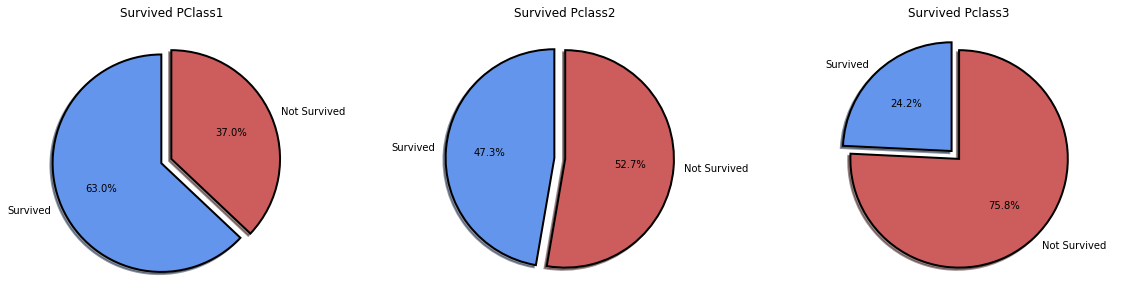

In [40]:
import matplotlib.pyplot as plt

fig,(ax2,ax1,ax3)=plt.subplots(1,3, figsize=(20,5))
colores = ('cornflowerblue','indianred' )
labels=['Survived','Not Survived']

#Definindo pie Pclass1
sizes2=[dfbase.query('Pclass==1 and Survived==1').shape[0],
       dfbase.query('Pclass==1 and Survived==0').shape[0]]

ax2.axis('equal')
ax2.set(title="Survived PClass1")
ax2.pie(sizes2,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colores, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True},
        explode = ( 0.1, 0))



#Definindo pie Pclass2
sizes1=[dfbase.query('Pclass==2 and Survived==1').shape[0],
       dfbase.query('Pclass==2 and Survived==0').shape[0]]

ax1.axis('equal')
ax1.set(title="Survived Pclass2")
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colores, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True},
        explode = ( 0.1, 0))


#Definindo pie Pclass3
sizes1=[dfbase.query('Pclass==3 and Survived==1').shape[0],
       dfbase.query('Pclass==3 and Survived==0').shape[0]]

ax3.axis('equal')
ax3.set(title="Survived Pclass3")
ax3.pie(sizes1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,
        colors = colores, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True},
        explode = ( 0.1, 0))

plt.show();

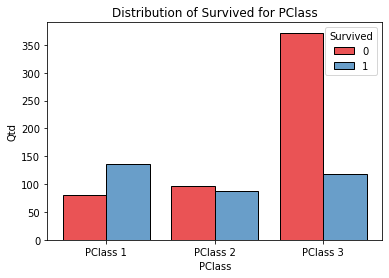

In [41]:
# plt.figure(figsize=(14,4))
plt.title('Distribution of Survived for PClass')
plt.xlabel('PClass')
plt.ylabel('Qtd')
plt.grid(False)
# sns.set(font_scale = 1)
locs, labels = plt.xticks()
plt.xticks([3, 1, 2], ['PClass 3', 'PClass 1', 'PClass 2'])

sns.histplot(data=dfbase, x='Pclass',
             bins=6, color='green', linewidth=1, 
             edgecolor='black', hue='Survived', multiple="dodge",palette="Set1", shrink=.8, discrete=True)

plt.show();


#Pode-se verificar que a proporção de sobreviventes e relação a sua respectiva 
#classe aumenta com a melhoria da classe.

### Respostas teste:

#### 1 - Analise as distribuições dos dados por idade. Comente as suas impressões

A variável Age apresenta cerca de 20% dos dados faltantes, optei por não inferir valores e trabalhar somente com os dados conhecidos.

A idade média dos passageiros é inferior a 30 anos, sendo que 75% dos passageiros tem até 38 anos, sendo a faixa de idade dominante entre 20 e 30 anos.  

#### 2 - Faca um gráfico de calor das correlações e comente os resultados encontrados

Observando o gráfico de calor das correlações verifica-se que  há correlação fraca e inversa(-0.31) entre as variáveis Age(idade) e SibSp(Número de irmãos ou cônjuges a bordo).

Vide: mapa de calor acima

Verificou também correlação fraca e direta(0.38) entre SisbSp e Parch(Número de pais ou filhos a bordo).

 Aparentemente pessoas de mais idade viajavam com menor número de parentes.

Pessoas irmãos ou conjgues a bordo tendem a estar com os pais ou filhos.

#### 3 - Analise a correlação do preço do bilhete e idade do passageiro

Observando o mapa de calor temos correlação desprezível entre o preço do bilhete e a idade, verifica-se que não há relação de linearidade tambem pelo grárifo de dispersão "Quantitativa x Quantitativa"

O gráfico de barras em "Olhando com mais atenção para a variável Fare" mostra que passageiros que possuem idade entre 30 e 70 anos têm valores médios de ticket(Fare) mais elevados.

#### 4 - Plot a distribuição por sexo com identificação de quem sobreviveu ou não e comente o gráfico

Vide: Olhando com mais atenção para a variável Sexo(Sex)

Observando os gráficos abaixo verifica-se que embora a quantidade total de homens(male) seja superior a quantidade total de mulheres(female), a quantidade de mulheres sobreviventes é superior em relação a quantidade de homens sobreviventes. As proporções podem ser verificadas nos gráficos de pizza.

#### 5 – Faça um resumo sobre o que você conseguiu analisar do dataset.

Em relação a tripulação total 72% dos passageiros embarcaram no porto S, sendo este o porto de maior embarque.

O preço máximo do bilhete paga seja de 512.33, contudo 75% dos passageiros pagou até 31.00, poucos passageiro sobreviventes
com cerca de 30 anos pagaram os valos mais elevados.

Por ultimo verifiquei que a proporção de sobreviventes e relação a sua respectiva classe aumenta com a melhoria da classe.


In [42]:
#Salva o arquivo em formato csv
dfbase.to_csv("../datasets/gerados/Titanic_clean.csv")